In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from datetime import datetime

In [17]:
items = {
    'DHW Avg (Divide by 7)': 'avgdiv7.csv',
    'DHW Avg (Divide by 2)': 'avgdiv2.csv',
    'DHW Avg (No Division)': 'avgnodiv.csv',
    'DHW Max (Divide by 7)': 'maxdiv7.csv',
    'DHW Max (Divide by 2)': 'maxdiv2.csv',
    'DHW Max (No Division)': 'maxnodiv.csv',
}

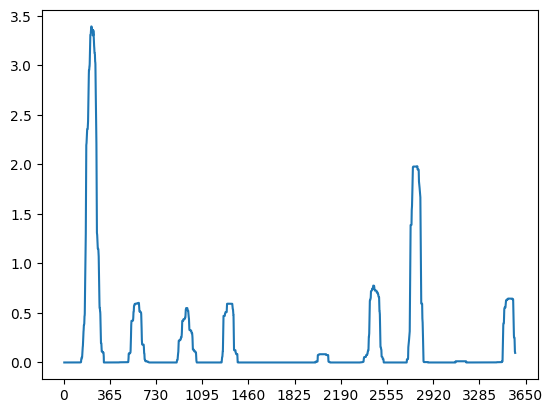

In [42]:
from ipywidgets import Button, interact, Dropdown, Text

# Create a ipywidget that is dropdown menu of items, specifically the keys
item = Dropdown(
    options=items.keys(),
    value='DHW Avg (Divide by 7)',
    description='Item:',
)

# Widget for start date, this should be a text box. Default text should be yyyymmdd
start_date = Text(
    value='20100401',
    description='Start Date:',
)

# Same thing for end date
end_date = Text(
    value='20110401',
    description='End Date:',
)

start_button = Button(description='Run Analysis')

output = widgets.Output()

vbox = widgets.VBox([item, start_date, end_date, start_button, output])

def on_button_clicked(b):
    def run_analysis(item, start_date, end_date):
        print('Item:', item)
        print('Start Date:', datetime.strptime(start_date, '%Y%m%d'))
        print('End Date:', datetime.strptime(end_date, '%Y%m%d'))
        
        # plot item's value based on item, which is the key
        df = pd.read_csv(f'./csvfiles/{items[item]}')
        
        # Using datetime, take the start_date (format: yyyymmdd) and find amount of days between start and 20100326
        start_date = datetime.strptime(start_date, '%Y%m%d')
        end_date = datetime.strptime(end_date, '%Y%m%d')
        total_timespan = (end_date - start_date).days
        time_start = (start_date - datetime(2010, 3, 26)).days
        
        print(f'Total Span of Time: {total_timespan} days.')
        
        # Make the df go from the index of time_start to time_start + total_timespan
        df = df[time_start:time_start + total_timespan]
        #print(df)
        
        return df, total_timespan
        
    with output:
        output.clear_output(wait = True)
        df, timespan = run_analysis(item.value, start_date.value, end_date.value)
        
        # plot df's 'sst' variable
        plt.plot(df['sst'])
        
        # Plot x-ticks based on timespan
        if timespan < 100:
            # Plot every 10 days in df 'date'
            plt.xticks(np.arange(0, timespan, 10), df['date'][::10], rotation=45)
        # now between 100 and 365, do it every 30 days
        elif timespan < 365 and timespan >= 100:
            plt.xticks(np.arange(0, timespan, 30), df['date'][::30], rotation=45)
        # Now between 365 and 730, do it every 60 days
        elif timespan < 730 and timespan >= 365:
            plt.xticks(np.arange(0, timespan, 60), df['date'][::60], rotation=45)
        # Now if greater than 730, do every 365 days
        else:
            plt.xticks(np.arange(0, timespan, 365), df['date'][::365], rotation=45)
        
        plt.grid()
        
        # Set title to be the item
        plt.title(f'{item.value} between {start_date.value} and {end_date.value}')
        plt.xlabel('Date')
        plt.ylabel('DHW Values')
        
        # Make the plot pretty
        plt.tight_layout()
        plt.show()
        
        

# Now show everything in an interactive frame
start_button.on_click(on_button_clicked)
display(vbox)
